<h1>Titanic: Machine Learning from Disaster </h1>

# INTRODUCTION

<p>The sinking of the Titanic is one of the most infamous shipwrecks in history.</p>

<p>On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we were asked to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).</p>

# Loading Data

In [4]:
import pandas as pd 
#Load CSV files into dataframes
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

display(train.head()) #train dataset
print("Dimensions of train: {}".format(train.shape)) #Dimensions in Rows and Column

display(test.head()) #test dataset
print("Dimensions of test: {}".format(test.shape)) #Dimensions in Rows and Column

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Dimensions of train: (891, 12)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Dimensions of test: (418, 11)


<p> The <strong>train</strong> dataframe contain has one more column than the <strong>test</strong> dataframe. This addition column(Survival) is our target 
samples where prediction will be carried on</p>

<p> So far, it is observed <strong>train</strong> dataframes contains 891 rows and 12 column, while <strong>test</strong> dataframe contains 418 rows and 11 column

#  Data Exploration

<p>The files we just opened are available on <a href ="https://www.kaggle.com/c/titanic/data">the data page for the Titanic competition on Kaggle</a>.  Below are the descriptions contained in that data 
dictionary:</P>
<ul>
    <li>PassengerId - A column added by Kaggle to identify each row and make submissions easier </li>
    <li>Survived - Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)</li>
    <li>Pclass - The class of ticket passenger purchased (1 = 1st, 2 = 2nd, 3 = 3rd)</li>
    <li>Name - Name of the passengers.</li>
    <li>Sex - The passenger’s sex</li>
    <li>Age - The passenger’s age in years</li>
    <li>SibSp - The number of siblings or spouses the passenger had aboard the Titanic</li>
    <li>Parch - The number of parents or children the passenger had aboard the Titanic.</li>
    <li>Ticket - The passenger’s ticket number</li>
    <li>Fare - The fare the passenger paid</li>
    <li>Cabin - The passenger’s cabin number</li>
    <li>Embarked - The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)</li>
</ul>    

In [5]:
# Summary of the train data to inspect
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<p>The <strong>Embarked</strong>, <strong>Fare</strong>, <strong>Ticket</strong>, <strong>Name</strong> and <strong>PassengerId</strong> samples are not  factors to be considered as they don't neccesarily contribute to the survival of passengers</p>

### Gaining more insights 

In [7]:
#using descriptive statistics 
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<p>Minimum survival rate at is 0.48 years and the maximum age of survival is 80 years. The <strong>Age</strong> contains Null values which might affect our predictions. Further analysis wil be done as we progress to get rid of the Null values. </p>

In [22]:
#checking parcentage Null values in the dataframes
def find_missing_data(data):
    Total = data.isnull().sum().sort_values(ascending = False)
    Percentage = (data.isnull().sum()/data.isnull().count()).sort_values(ascending = False) * 100
    
    return pd.concat([Total,Percentage] , axis = 1 , keys = ['Total' , 'Percentage(%)'])

#check percentage missing data in the train dataframe
find_missing_data(train)

,Total,Percentage(%)
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


<p> Once again, <strong> Age </strong> contains 19.8% of Null values which can be still considered in our predictions. <strong>Cabin</strong> of 687 total Null values with 77% of the whole dataset will be a major challenge if considered in our future predictions. Hence, we drop the <strong>Cabin</strong> alongside the <strong>Embarked</strong>, <strong>Fare</strong>, <strong>Ticket</strong>, <strong>Name</strong> and <strong>PassengerId</strong> </p>

# Data Processing 

<p> The predictor samples for our analysis are <strong>Age</strong>, <strong>Sex</strong>, <strong>Pclass</strong>, <strong>Parch</strong>, <strong>SibSp</strong>. </p>

## Age

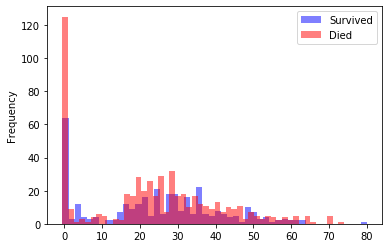

In [49]:
import matplotlib.pyplot as plt
survived = train[train["Survived"] == 1]
died = train[train["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
died["Age"].plot.hist(alpha=0.5,color='red',bins=50)
plt.legend(['Survived','Died'])
plt.show()

<p>The observation from the chart here is not clear enough for deduction, but we can see that in some age ranges the survival rate is higher than the death rate - where the green bars are greater than the blue bars.  We will categorize the dataset to gain more insight of chart and fit in the missing values</p>

<p> Our data will be categorize with following labels: </p>
<ul>
    <li><em>Missing</em>- from -1 to 0</li>
    <li><em>Infant</em>- from 0 to 5</li>
    <li><em>Child</em>- from 5 to 12</li>
    <li><em>Teenager</em>- from 12 to 18</li>
    <li><em>Young Adult</em>- from 18 to 35</li>
    <li><em>Adult</em>- from 35 to 40</li>
    <li><em>Old-Adult</em>- from 60 to 100</li>
</ul>

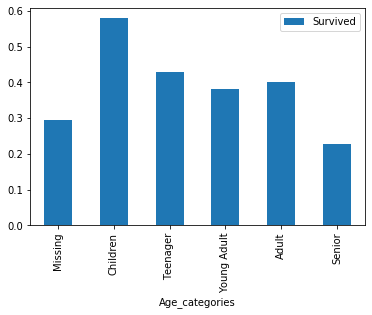

In [47]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1,0,12,18,35,60,100]
label_names = ["Missing","Children","Teenager","Young Adult","Adult","Senior"]
train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)

pivot = train.pivot_table(index="Age_categories",values='Survived')
pivot.plot.bar()
plt.show()

<p> <strong>Chidren</strong> has the highest survival rate followed by <strong>Teenager</strong>, <strong>Adult</strong> and <strong>Young Adult</strong></p>

## Sex

<p> Predicting survival rate by sex. Sex is a categorical data, we use bar chart to visualize the data</p>

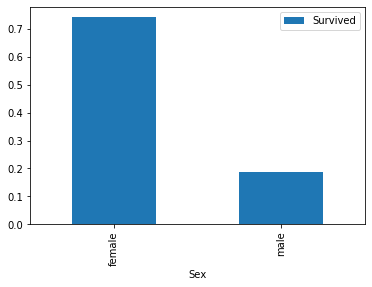

In [52]:
sex_pivot = train.pivot_table(index="Sex",values="Survived")
sex_pivot.plot.bar()
plt.show()

<p>We can immediately see that females survived in much higher proportions than males did.<p>

## Pclass

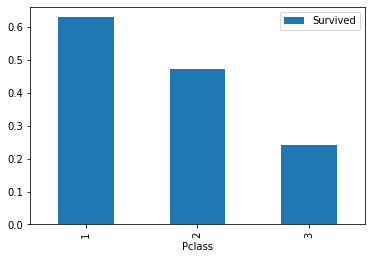

In [55]:
class_pivot = train.pivot_table(index="Pclass",values="Survived")
class_pivot.plot.bar()
plt.show()

<p>First class passengers has more chance of survival than Second class and third class passengers</p>

## Parch

In [64]:
train['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

<p>The number of parent or children carried along aboard by a passenger  is 6</p>

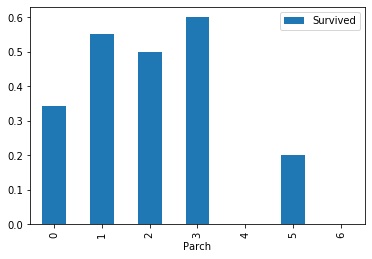

In [65]:
Parch_pivot = train.pivot_table(index="Parch",values="Survived")
Parch_pivot.plot.bar()
plt.show()

<p> Passengers with 1 to 3 parents or children aboard has high chance of survival</p>

## SibSp

In [68]:
train['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

<p>The minimum and maximum numbers of spouse or siblings abord were 1 and 8 respectively</p>

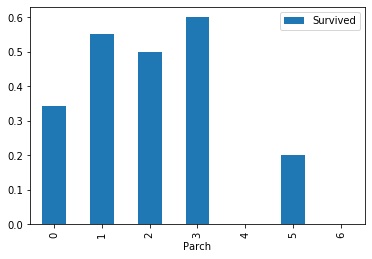

In [70]:
Parch_pivot = train.pivot_table(index="Parch",values="Survived")
Parch_pivot.plot.bar()
plt.show()

<p>Passengers with 1 to 3 siblings/spouse on board has more chance of survival</p>

# Preparing Data for Modelling

In [79]:
#creating dummy list
def dummies_list(df,column_name):
    List = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,List],axis=1)
    return df

for column in ["Pclass","Sex","Age_categories","Parch", "SibSp"]:
    train = dummies_list(train,column)
    test = dummies_list(test,column)

In [85]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_categories',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing', 'Age_categories_Children',
       'Age_categories_Teenager', 'Age_categories_Young Adult',
       'Age_categories_Adult', 'Age_categories_Senior', 'Parch_0', 'Parch_1',
       'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6', 'SibSp_0',
       'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8'],
      dtype='object')

# Modelling

In [88]:
from sklearn.linear_model import LogisticRegression

columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing', 'Age_categories_Children',
       'Age_categories_Teenager', 'Age_categories_Young Adult',
       'Age_categories_Adult', 'Age_categories_Senior', 'Parch_0', 'Parch_1',
       'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6', 'SibSp_0',
       'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8']

lr = LogisticRegression()
lr.fit(train[columns], train["Survived"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='25', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='25', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [89]:
holdout = test # from now on we will refer to this
               # dataframe as the holdout data

from sklearn.model_selection import train_test_split

all_X = train[columns]
all_y = train['Survived']

train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.20,random_state=0)

In [90]:
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)
accuracy = accuracy_score(test_y, predictions)
print(accuracy)

0.8044692737430168


<p> Our model has an accuracy score of 80.4% </p>

# Cross Validation

In [92]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
scores = cross_val_score(lr, all_X, all_y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.76404494 0.7752809  0.78888889 0.79775281 0.80898876 0.80898876
 0.82022472 0.82022472 0.82022472 0.85393258]
0.8058551810237203


<p> From the results of our k-fold validation, the accuracy number varies with each fold – ranging between 76.4% and 85.3%. As it happens, our average accuracy score was 80.5%, which is not far from the 80.4% we got from our simple train/test split.</p>

In [94]:
lr = LogisticRegression()
lr.fit(all_X,all_y)
holdout_predictions = lr.predict(holdout[columns])

holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)

In [95]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [96]:
submission.to_csv("submission.csv",index=False)